In [9]:
import pandas as pn
import numpy as np
import os

In [151]:
# dir_name = 'examples/'
# pictuares = []
# for name in os.listdir(dir_name):
#     full_name = os.path.join(dir_name, name) # получаем полное имя
#     if os.path.isfile(full_name):
#         pictuares.append(full_name)

In [152]:
data_for_train = pn.read_excel(io=open('table_examples.xlsx', 'rb'))
all_data = pn.read_excel(io=open('135320_allgrains_corrected.xlsx', 'rb'))

In [153]:
data_for_train

,№ по порядку,№ элемента общей таблице,X,Y,Площадь,Периметр,Форм фактор,Удлинение(F/G)
0,1,71,1,2901,1846,376,76.585049,1.520000
1,2,462,32,439,259,190,139.382239,1.444444
2,3,677,46,791,1691,1248,921.054997,1.629630
3,4,915,61,1,2652,468,82.588235,5.250000
4,5,1741,120,3577,133,96,69.293233,1.214286
5,6,1926,136,2259,231,214,198.251082,4.636364
6,7,2520,189,721,17025,914,49.068781,1.421429
7,8,2715,203,3617,3153,780,192.959087,1.627119
8,9,3245,246,4164,1166,408,142.765009,2.677419
9,10,3312,253,1619,4307,758,133.402368,3.625000


In [154]:
all_data[999:1000]

,№ элемента по порядку,X,Y,Площадь,Периметр,Макс длина,Перп ширина,Угол наклона,факт высота,факт ширина,Пощадь прям(F*G),Форм фактор,D/K,Удлинение(F/G),Площадь прям(I*J),D/O,Средняя яркость,X координата центра масс,Y координата центра масс
999,31380.0,2770.0,2849.0,0.000394,0.158154,0.034596,0.023064,48.0,0.029654,0.032949,0.000798,63.558621,0.493197,1.5,0.000977,0.402778,73.544828,2782.0,2846.0


In [155]:
import math

count_vals = 1000

values = np.array(data_for_train.get_values(), dtype='float')
all_values = np.array(all_data.get_values(), dtype='float')[:count_vals]

positions = np.array(values[:, 1], dtype='int')

fields = all_data.columns.values.tolist()
fields = {  fields[i] : i for i in range(len(fields)) }

# dims = list(fields.keys())

# del dims[0]
# del dims[0]
# del dims[0]
# del dims[0]
# del dims[8]
# del dims[8]
# del dims[10]
# del dims[10]
# del dims[10]

# dims = {
#     i : {
#         'pos' : fields[i], 
#         'dim' : 0
#     } for i in dims
# }

# dims['Пощадь прям(F*G)']['dim'] = 2
# dims['Периметр']['dim'] = 1
# dims['факт ширина']['dim'] = 1
# dims['Перп ширина']['dim'] = 1
# dims['Макс длина']['dim'] = 1
# dims['Площадь']['dim'] = 2
# dims['Удлинение(F/G)']['dim'] = 1
# dims['Площадь прям(I*J)']['dim'] = 2
# dims['факт высота']['dim'] = 1



In [156]:
colors = {
    0 : 'b', 
    1 : 'g', 
    2 : 'r',
    3 : (0.96, 0.58, 0.01, 1),
    4 : (0.01, 0.96, 0.07, 1),
    5 : 'c', 
    6 : 'w', 
    7 : 'k', 
    8 : 'y', 
    9 : 'm'
}

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [159]:
# plt.figure(figsize=(5, 5))

# plt.plot(range(len(values[:, 0])), 
#          normalize(values[:, fields['Площадь']] / values[:, fields['Площадь прям(I*J)']]),
#          'r')
# plt.plot(range(len(values[:, 0])), 
#          normalize(values[:, fields['Площадь']] / values[:, fields['Площадь прям(I*J)']]),
#          'bo')

# plt.plot(range(len(values[:, 0])), 
#          normalize(values[:, fields['Периметр']] / (values[:, fields['факт высота']] + values[:, fields['факт ширина']])),
#          'b')
# plt.plot(range(len(values[:, 0])), 
#          normalize(values[:, fields['Периметр']] / (values[:, fields['факт высота']] + values[:, fields['факт ширина']])),
#          'ro')

# plt.show()

In [160]:
# f, axs = plt.subplots(nrows=3, ncols=5, figsize=(10, 10))
# axs = axs.flatten()

# for ax, pictuare in zip(axs, pictuares):
    
#     img = mpimg.imread(pictuare)
    
#     ax.imshow(img)
#     ax.set_title(pictuare.split('/')[1])
    
# plt.tight_layout()
# plt.show()

In [161]:
def normalize(v = []):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

def centrate(v):
    
    std = np.std(v) * np.ones(v.shape)
    E = np.mean(v) * np.ones(v.shape)
    
    return (v - E) / std

# for i in range(len(all_values[1])):
#     if i != 0:
#         all_values[:, i] = centrate(v=all_values[:, i])
        
# print(all_values)


vals = []
for i in positions:
    element = None
    for j in all_values:
        if math.fabs(j[0] - i) < 0.001:
            element = j
    
    vals.append(element)

del vals[6]
del vals[11]
    
values = np.array(vals)

# for i in range(len(all_values[1])):
#     all_values[:, i] = normalize(v=all_values[:, i])

### Square

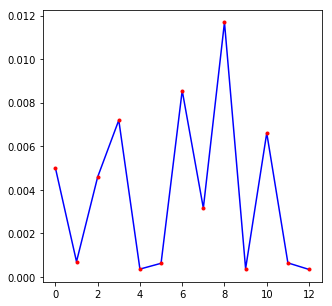

In [162]:
nums = range(len(values[:, fields['Площадь']]))

plt.plot(nums, values[:, fields['Площадь']], 'b', nums, values[:, fields['Площадь']], '.r')
plt.show()

### Форм фактор

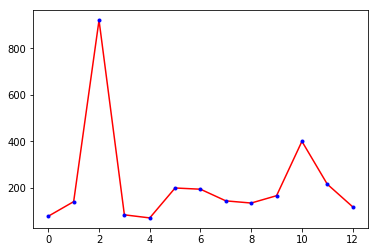

In [163]:
nums = range(len(values[:, fields['Форм фактор']]))

plt.plot(nums, values[:, fields['Форм фактор']], 'r')
plt.plot(nums, values[:, fields['Форм фактор']], '.b')
plt.show()

In [164]:
from sklearn import cluster
import scipy
import matplotlib

# Кластеризация для подтверждения, что тут действительно выделяется 9 классов

In [173]:
def plot_summary_distances(max_clusters = 9, values=[]):
    
    summary_distance = []

    for i in range(max_clusters):
        result = cluster.KMeans(n_clusters=i+1, random_state=0).fit(values)
        
        labels = result.labels_
        centers = result.cluster_centers_
        
        distance = 0
        for j in range(len(values)):
            center = centers[i]
            label = labels[i]
            distance += scipy.spatial.distance.euclidean(u=center, v=values[i])

        summary_distance.append(distance)

    plt.plot([i + 1 for i in range(len(summary_distance))], summary_distance, 'r')
    plt.plot([i + 1 for i in range(len(summary_distance))], summary_distance, '.b')
    plt.show()
    
    print('min :', round(min(summary_distance[1:]), 3), ' at ', np.argmin(summary_distance[1:]) + 2)
    

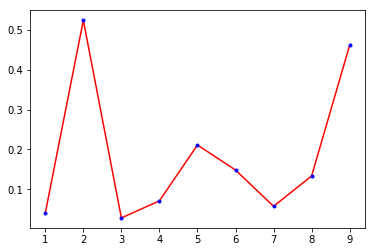

min : 0.028  at  3


In [174]:
plot_summary_distances(values=[[i[0], i[1]] for i in zip(values[:, fields['Площадь прям(I*J)']], values[:, fields['Площадь']])], 
                       max_clusters=9)

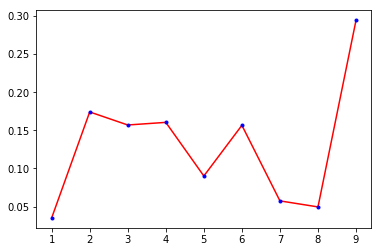

0.04949543153655493  at  8


In [167]:
plot_summary_distances(values=[[i[0], i[1]] 
                               for i in zip(values[:, fields['Пощадь прям(F*G)']], values[:, fields['Площадь']])], 
                       max_clusters=9)

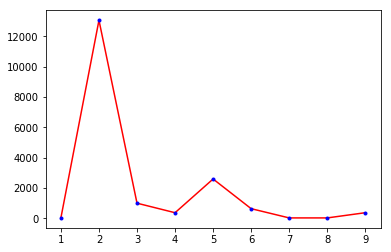

34.924877998715225  at  7


In [168]:
plot_summary_distances(values=[[i[0], i[1]] 
                               for i in zip(all_values[:1100, fields['Пощадь прям(F*G)']], all_values[:1100, fields['Площадь']])], 
                       max_clusters=9)

In [129]:
all_data[:5]

,№ элемента по порядку,X,Y,Площадь,Периметр,Макс длина,Перп ширина,Угол наклона,факт высота,факт ширина,Пощадь прям(F*G),Форм фактор,D/K,Удлинение(F/G),Площадь прям(I*J),D/O,Средняя яркость,X координата центра масс,Y координата центра масс
0,1.0,1.0,1.0,0.002182,0.332782,0.093904,0.046128,79.0,0.037891,0.090609,0.004332,50.751244,0.503759,2.035714,0.003433,0.635573,230.708955,26.0,10.0
1,2.0,1.0,28.0,0.008131,1.881372,0.243821,0.060955,0.0,0.243821,0.060955,0.014862,435.301736,0.547115,4.000000,0.014862,0.547115,144.058411,16.0,99.0
2,4.0,1.0,165.0,0.000280,0.092256,0.026359,0.018122,-7.0,0.024712,0.016474,0.000478,30.446602,0.585227,1.454545,0.000407,0.686667,192.553398,6.0,173.0
3,5.0,1.0,210.0,0.002510,0.698513,0.131795,0.041186,2.0,0.131795,0.041186,0.005428,194.352432,0.462500,3.200000,0.005428,0.462500,129.742703,9.0,243.0
4,8.0,1.0,338.0,0.000328,0.247115,0.046128,0.023064,33.0,0.039538,0.031301,0.001064,185.950413,0.308673,2.000000,0.001238,0.265351,129.223140,9.0,335.0


# Clustering

In [140]:
def visialize_clusters_agglomerative(first_param = [], 
                       second_param = [], 
                       first_param_train = [], 
                       second_param_train = [], 
                       clusters=3, 
                       visualize_train=True, 
                       count_objects=1000):

    for_clustering = [[i[0], i[1]] for i in zip(first_param, second_param)]
    result = cluster.AgglomerativeClustering(n_clusters=clusters).fit(for_clustering[:count_objects])

    plt.figure(figsize=(15, 15))
    for i in zip(result.labels_, for_clustering):
        label = i[0]
        obj = i[1]
        color = colors[label]
        plt.plot(obj[0], obj[1], color=color, marker='o', markersize=5)

    for_clustering = [[i[0], i[1]] for i in zip(first_param_train, second_param_train)]
    result = cluster.KMeans(n_clusters=clusters).fit(for_clustering)
    
    for i in zip(result.labels_, for_clustering):
        label = i[0]
        obj = i[1]
        color = colors[label]
        plt.plot(obj[0], obj[1], color=color, marker='*', markersize=5)

    plt.show()

In [149]:
def visialize_clusters_kmeans(first_param = [], 
                       second_param = [], 
                       first_param_train = [], 
                       second_param_train = [], 
                       clusters=3,
                       visuallize_test=True,
                       visualize_train=True, 
                       count_objects=1000):

    for_clustering = [[i[0], i[1]] for i in zip(first_param, second_param)]
    result = cluster.KMeans(n_clusters=clusters, init='random').fit(for_clustering[:count_objects])

    plt.figure(figsize=(15, 15))
    for i in zip(result.labels_, for_clustering):
        label = i[0]
        obj = i[1]
        color = colors[label]
        plt.plot(obj[0], obj[1], color=color, marker='o', markersize=4)

    for_clustering = [[i[0], i[1]] for i in zip(first_param_train, second_param_train)]
    result = cluster.KMeans(n_clusters=clusters, init='random').fit(for_clustering)
    
    for i in zip(result.labels_, for_clustering):
        label = i[0]
        obj = i[1]
        color = colors[label]
        plt.plot(obj[0], obj[1], color=color, marker='*', markersize=7)

    plt.show()

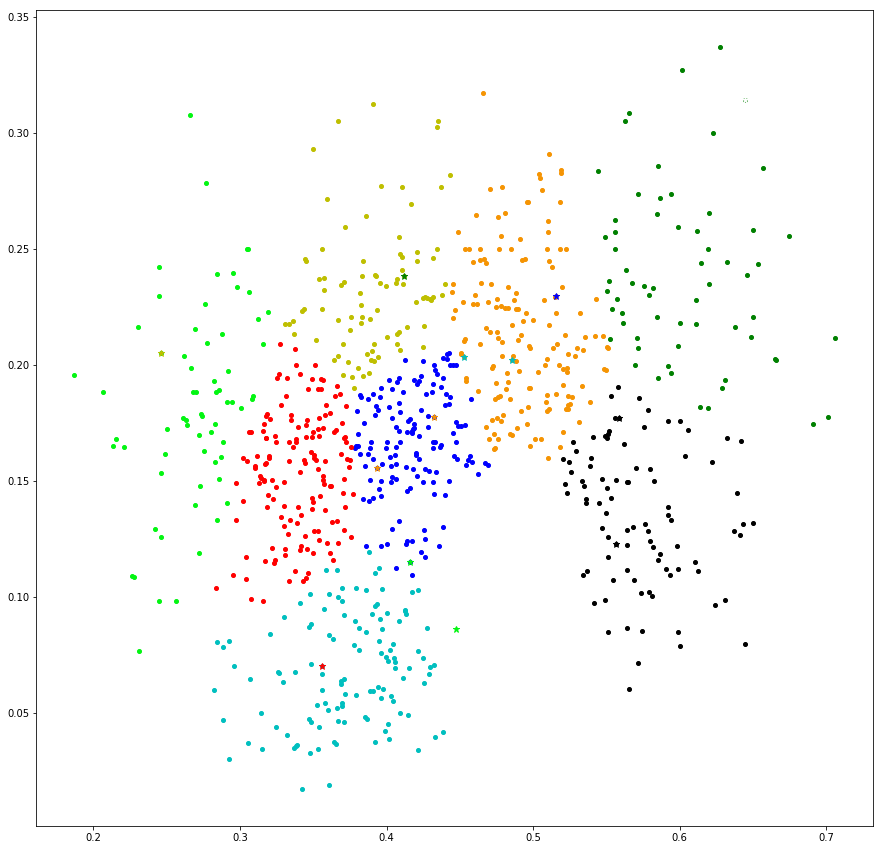

In [150]:
visialize_clusters_kmeans(all_values[:, fields['Площадь']] / all_values[:, fields['Пощадь прям(F*G)']],
                          all_values[:, fields['Макс длина']] / all_values[:, fields['Периметр']], 
                          values[:, fields['Площадь']] / values[:, fields['Пощадь прям(F*G)']],
                          values[:, fields['Макс длина']] / values[:, fields['Периметр']],
                          clusters=9, 
                       count_objects=1000)

Макс длина Удлинение(F/G) 1
Макс длина Площадь прям(I*J) 2
Макс длина факт ширина 3
Удлинение(F/G) Макс длина 4
Удлинение(F/G) Площадь прям(I*J) 5
Удлинение(F/G) факт ширина 6
Площадь прям(I*J) Макс длина 7
Площадь прям(I*J) Удлинение(F/G) 8
Площадь прям(I*J) факт ширина 9
факт ширина Макс длина 10
факт ширина Удлинение(F/G) 11
факт ширина Площадь прям(I*J) 12


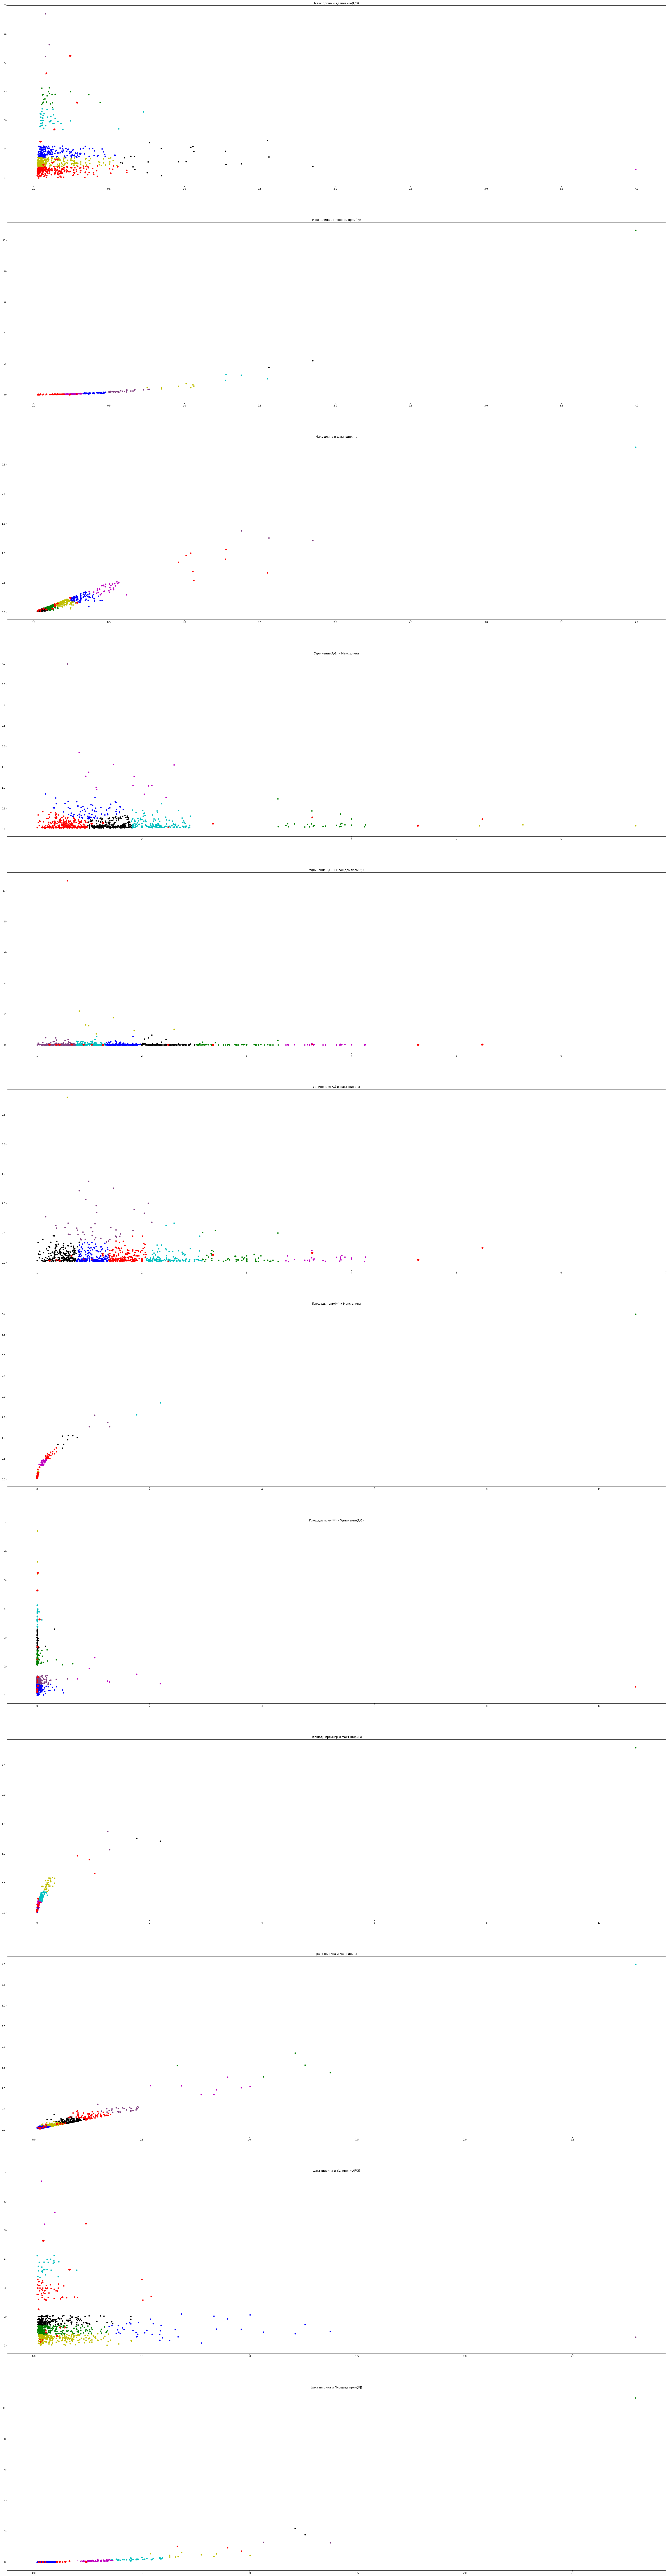

In [217]:
import math

k = 50
clusters = 9
count_objects = 1000
step = 0
visualize_train=True

accepted = ['Макс длина', 
            'Удлинение(F/G)', 
            'Площадь прям(I*J)', 
            'факт ширина', 
            'факт высота', 
            'Форм фактор', 
            'Периметр', 
            'Перп ширина',
            'Площадь', 
            'Пощадь прям(F*G)']

accepted = accepted[:4]

fig, axs = plt.subplots(ncols=1, nrows=len(accepted) * (len(accepted) - 1), figsize=(k, len(accepted) * k))
axs = axs.flatten()

for field_1 in fields:
    for field_2 in fields:
        if not(field_1 == field_2) and (field_1 in accepted) and (field_2 in accepted):
            ax = axs[step]
            
            step += 1
            
            print(field_1, field_2, step)
            
            first_param = all_values[:, fields[field_1]]
            second_param = all_values[:, fields[field_2]]

            first_param_train = values[:, fields[field_1]]
            second_param_train = values[:, fields[field_2]]

            for_clustering = [[i[0], i[1]] for i in zip(first_param, second_param)]
            result = cluster.KMeans(n_clusters=clusters).fit(for_clustering[:count_objects])

            for i in zip(result.labels_, for_clustering):
                label = i[0]
                obj = i[1]
                color = colors[label]
                ax.plot(obj[0], obj[1], color=color, marker='o', markersize=5)
                ax.set_title(field_1 + ' и ' + field_2)

            if visualize_train:
                ax.plot(first_param_train[:], second_param_train[:], '*r', markersize=10)
            #     print(color)

        
plt.show()


Удлинение(F/G) Перп ширина 1
Удлинение(F/G) Площадь 2
Удлинение(F/G) факт ширина 3
Удлинение(F/G) Площадь прям(I*J) 4
Удлинение(F/G) Периметр 5
Удлинение(F/G) факт высота 6
Удлинение(F/G) Макс длина 7
Удлинение(F/G) Пощадь прям(F*G) 8
Удлинение(F/G) Форм фактор 9
Перп ширина Удлинение(F/G) 10
Перп ширина Площадь 11
Перп ширина факт ширина 12
Перп ширина Площадь прям(I*J) 13
Перп ширина Периметр 14
Перп ширина факт высота 15
Перп ширина Макс длина 16
Перп ширина Пощадь прям(F*G) 17
Перп ширина Форм фактор 18
Площадь Удлинение(F/G) 19
Площадь Перп ширина 20
Площадь факт ширина 21
Площадь Площадь прям(I*J) 22
Площадь Периметр 23
Площадь факт высота 24
Площадь Макс длина 25
Площадь Пощадь прям(F*G) 26
Площадь Форм фактор 27
факт ширина Удлинение(F/G) 28
факт ширина Перп ширина 29
факт ширина Площадь 30
факт ширина Площадь прям(I*J) 31
факт ширина Периметр 32
факт ширина факт высота 33
факт ширина Макс длина 34
факт ширина Пощадь прям(F*G) 35
факт ширина Форм фактор 36
Площадь прям(I*J) Удл

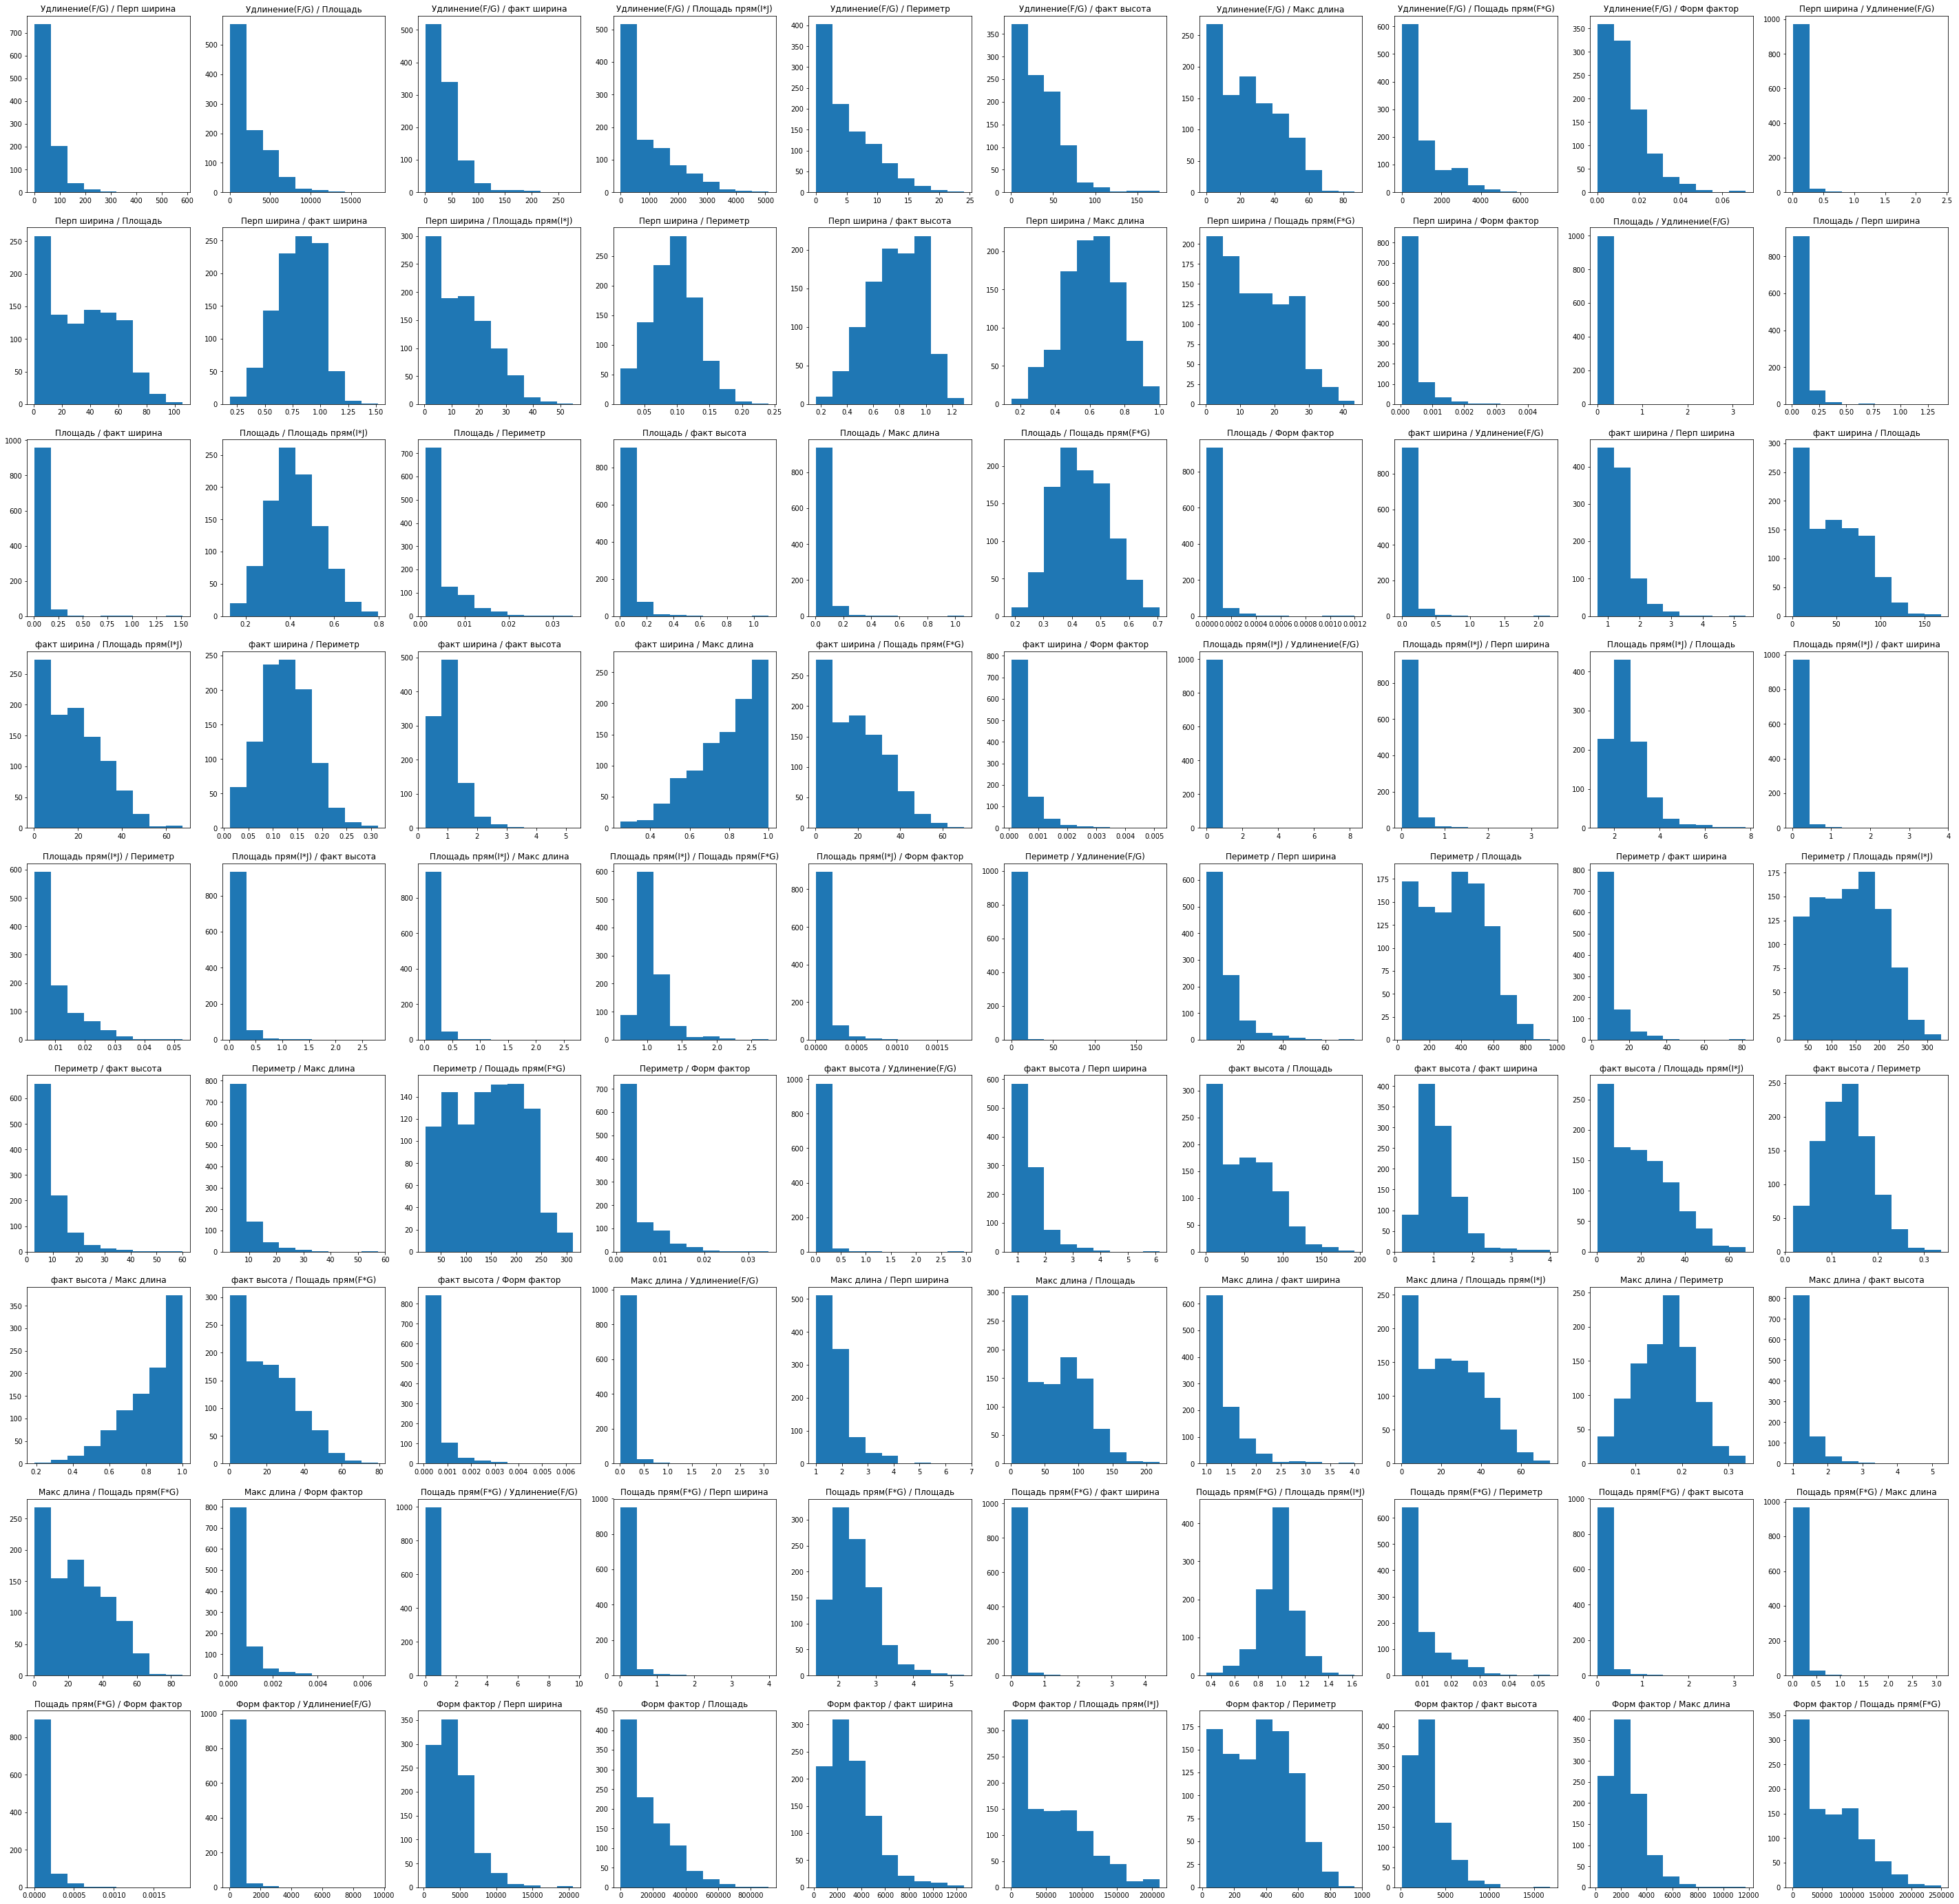

In [88]:
import math

k = 50
clusters = 9
count_objects = 1000
step = 0
visualize_train=True

accepted = ['Макс длина', 
            'Удлинение(F/G)', 
            'Площадь прям(I*J)', 
            'факт ширина', 
            'факт высота', 
            'Форм фактор', 
            'Периметр', 
            'Перп ширина',
            'Площадь', 
            'Пощадь прям(F*G)']

# accepted = accepted[0:4]
# accepted = accepted[2:6]
# accepted = accepted[4:8]
# accepted = accepted[6:10]

fig, axs = plt.subplots(ncols=len(accepted), nrows=(len(accepted) - 1), figsize=(k, k))
axs = axs.flatten()

for field_1 in fields:
    for field_2 in fields:
        if not(field_1 == field_2) and (field_1 in accepted) and (field_2 in accepted):
            ax = axs[step]
            
            step += 1
            
            print(field_1, field_2, step)
            
            first_param = all_values[:, fields[field_1]] / all_values[:, fields[field_2]]
            first_param_train = values[:, fields[field_1]] / values[:, fields[field_2]]

            ax.hist(first_param, 
                    bins=9)
            
            ax.set_title(field_1 + ' / ' + field_2)
        
plt.show()
